In [1]:
import pandas as pd
import numpy as np
import shap
from pathlib import Path

from biopsykit.classification.model_selection import SklearnPipelinePermuter

from src.pepbench.io import get_best_estimator

In [2]:
model_path = Path("../../../results/models/b-point")
data_path = Path("../../../results/data/b-point")

In [3]:
pipeline_permuter = SklearnPipelinePermuter.from_pickle(model_path.joinpath("without-rr-interval/b_point_regression_hpc_0_baseline_result.pkl"))
pipeline_permuter.metric_summary()

conf_matrix  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                        
StandardScaler  SelectFromModel     DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
                SelectKBest         DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   
                SelectKBest         DecisionTreeRegressor       [0.0]   
                                    RandomForestRegressor       [0.0]   
                                    SVR                         [0.0]   
                                    KNeighborsRegressor         [0.0]   

                                                          conf_matrix_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                              
StandardScaler  SelectFromModel     DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
                SelectKBest         DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   
                SelectKBest         DecisionTreeRegressor                []   
                                    RandomForestRegressor                []   
                                    SVR                                  []   
                                    KNeighborsRegressor                  []   

                                                                                                 true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                SelectKBest         DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    SVR                    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    KNeighborsRegressor    [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                                    RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 

In [4]:
best_estimator_summary = pipeline_permuter.best_estimator_summary()
best_estimator_summary


best_estimator
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                            
StandardScaler  SelectFromModel     DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
                SelectKBest         DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...
                SelectKBest         DecisionTreeRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...
                                    SVR                    [Pipeline(memory=Memory(location=cachedir/jobl...
                                    KNeighborsRegressor    [Pipeline(memory=Memory(location=cachedir/jobl...

In [5]:
_, best_estimator_combi = get_best_estimator(pipeline_permuter)
best_estimator_combi

('StandardScaler', 'SelectKBest', 'RandomForestRegressor')

#### Get the pipeline folds for the best performing pipeline combination

In [16]:
best_estimator_summary = pipeline_permuter.best_estimator_summary()
pipeline_folds = best_estimator_summary.loc[('StandardScaler', 'SelectKBest', 'DecisionTreeRegressor')]["best_estimator"].pipeline
pipeline_folds

[Pipeline(memory=Memory(location=cachedir/joblib),
          steps=[('scaler', StandardScaler()),
                 ('reduce_dim',
                  SelectKBest(k=6,
                              score_func=<function mutual_info_regression at 0x0000014F650E96C0>)),
                 ('clf',
                  DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                                        max_features=np.float64(0.7000000000000001),
                                        min_samples_leaf=np.int64(10),
                                        min_samples_split=np.int64(20),
                                        random_state=RandomState(MT19937) at 0x14F64F7D740))]),
 Pipeline(memory=Memory(location=cachedir/joblib),
          steps=[('scaler', StandardScaler()),
                 ('reduce_dim',
                  SelectKBest(score_func=<function mutual_info_regression at 0x0000014F650E96C0>)),
                 ('clf',
                  DecisionTreeRegressor(criterion

### Get the test folds used in the pipeline permuter

In [17]:
test_folds = pipeline_permuter.metric_summary().loc[best_estimator_combi]["test_indices_folds"]
test_folds.shape

(5,)

### Load the training data

In [18]:
data = pd.read_csv(data_path.joinpath("without-rr-interval/train_data_b_point.csv"), index_col=[0,1,2,3,4,5])
data

,,,,,,arbol2017-isoelectric-crossings,arbol2017-second-derivative,arbol2017-third-derivative,debski1993-second-derivative,drost2022,forounzafar2018,lozano2007-linear-regression,lozano2007-quadratic-regression,sherwood1990,stern1985
,participant,condition,phase,heartbeat_id_reference,b_point_sample_reference,,,,,,,,,,
0,GDN0005,Dummy,HoldingBreath,0,388.0,438.0,398.0,394.0,452.0,400.0,550.0,412.0,384.0,442.0,388.0
1,GDN0005,Dummy,HoldingBreath,1,404.0,340.0,350.0,244.0,388.0,420.0,402.0,404.0,384.0,330.0,402.0
2,GDN0005,Dummy,HoldingBreath,3,376.0,382.0,296.0,386.0,366.0,386.0,388.0,366.0,348.0,382.0,374.0
3,GDN0005,Dummy,HoldingBreath,4,390.0,394.0,344.0,396.0,376.0,396.0,398.0,372.0,348.0,394.0,388.0
4,GDN0005,Dummy,HoldingBreath,5,386.0,398.0,312.0,388.0,418.0,392.0,390.0,378.0,354.0,400.0,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11606,VP_032,tsst,Talk,39,310.0,335.0,276.0,324.0,300.0,318.0,306.0,305.0,294.0,337.0,306.0
11607,VP_032,tsst,Talk,40,322.0,331.0,298.0,330.0,311.0,322.0,311.0,321.0,303.0,329.0,287.0
11608,VP_032,tsst,Talk,41,340.0,317.0,300.0,348.0,330.0,343.0,309.0,332.0,322.0,311.0,287.0


In [19]:
fold = 0
pipeline = pipeline_folds[fold]
pipeline

Pipeline(memory=Memory(location=cachedir/joblib),
         steps=[('scaler', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=6,
                             score_func=<function mutual_info_regression at 0x0000014F650E96C0>)),
                ('clf',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                                       max_features=np.float64(0.7000000000000001),
                                       min_samples_leaf=np.int64(10),
                                       min_samples_split=np.int64(20),
                                       random_state=RandomState(MT19937) at 0x14F64F7D740))])

In [21]:
X_test = data.iloc[list(test_folds[fold]), :]
estimator = pipeline[-1]
print(X_test.values)
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(estimator)
shap_values_fold = explainer.shap_values(X_test)

[[382. 288. 384. ... 368. 386. 332.]
 [370. 292. 376. ... 370. 366. 236.]
 [334. 318. 396. ... 366. 338. 232.]
 ...
 [233. 167. 224. ... 229. 236. 215.]
 [233. 130. 226. ... 225. 226. 215.]
 [235. 156. 213. ... 224. 240. 213.]]


In [22]:
test_shap_values_fold = shap_values_fold.copy()
test_shap_values_fold

array([[  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ],
       [  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ],
       [  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ],
       [  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ],
       [  1.21365826,   5.75071675, 145.02885615, ...,   0.        ,
          0.        ,   0.        ]], shape=(1996, 10))

In [23]:
estimator.feature_importances_

array([0.00244933, 0.06617886, 0.34416444, 0.02849491, 0.53043653,
       0.02827593])

In [28]:
feature_selector = pipeline[-2]
feature_selector.get_support()

array([False,  True, False,  True,  True,  True,  True, False, False,
        True])

In [32]:
data.columns[feature_selector.get_support()]

Index(['arbol2017-second-derivative', 'debski1993-second-derivative',
       'drost2022', 'forounzafar2018', 'lozano2007-linear-regression',
       'stern1985'],
      dtype='object')

In [34]:
data[data.columns[feature_selector.get_support()]].values

array([[398., 452., 400., 550., 412., 388.],
       [350., 388., 420., 402., 404., 402.],
       [296., 366., 386., 388., 366., 374.],
       ...,
       [300., 330., 343., 309., 332., 287.],
       [324., 347., 354., 305., 351., 305.],
       [313., 285., 332., 302., 341., 301.]], shape=(10397, 6))

In [37]:
data.columns[feature_selector.get_support()].values

array(['arbol2017-second-derivative', 'debski1993-second-derivative',
       'drost2022', 'forounzafar2018', 'lozano2007-linear-regression',
       'stern1985'], dtype=object)

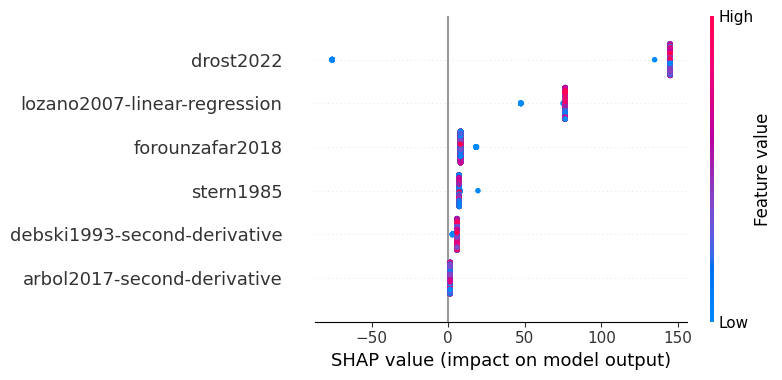

In [41]:
features = data.iloc[list(test_folds[fold]), :][data.columns[feature_selector.get_support()]].values
feature_names = data.columns[feature_selector.get_support()]
shap.summary_plot(
    test_shap_values_fold[:,:6], features=features, feature_names=feature_names
)

In [40]:
test_shap_values_fold[:,:6]

array([[  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538],
       [  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538],
       [  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538],
       ...,
       [  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538],
       [  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538],
       [  1.21365826,   5.75071675, 145.02885615,   8.07761385,
         76.42108056,   7.12002538]], shape=(1996, 6))

In [14]:
test_shap_per_fold = shap_per_fold.copy()
test_shap_per_fold

[array([[ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334],
        [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334],
        [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334],
        ...,
        [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334],
        [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334],
        [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
          0.6852067 ,  9.92755334]], shape=(1996, 10)),
 array([[1.42523728, 0.9029365 , 3.01046103, ..., 5.5418011 , 1.44425286,
         6.29832037],
        [1.42523728, 0.9029365 , 3.01046103, ..., 5.5418011 , 1.44425286,
         6.29832037],
        [1.42523728, 0.9029365 , 3.01046103, ..., 5.5418011 , 1.44425286,
         6.29832037],
        ...,
        [1.42523728, 0.9029365 , 3.01046103, ..., 5.54

In [15]:
test_shap_values_fold = shap_values_fold.copy()
test_shap_values_fold

array([[1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327],
       [1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327],
       [1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327],
       ...,
       [1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327],
       [1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327],
       [1.53556522, 0.24706237, 0.45137711, ..., 6.93160974, 1.3358541 ,
        6.07427327]], shape=(2124, 10))

In [87]:
shap_values = np.concatenate(shap_per_fold)
shap_values

array([[ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       ...,
       [ 1.53556522,  0.24706237,  0.45137711, ...,  6.93160974,
         1.3358541 ,  6.07427327],
       [ 1.53556522,  0.24706237,  0.45137711, ...,  6.93160974,
         1.3358541 ,  6.07427327],
       [ 1.53556522,  0.24706237,  0.45137711, ...,  6.93160974,
         1.3358541 ,  6.07427327]], shape=(10397, 10))

In [95]:
print(np.mean(test_shap_per_fold[0], axis=0))
print(np.mean(test_shap_per_fold[1], axis=0))
print(np.mean(test_shap_per_fold[2], axis=0))
print(np.mean(test_shap_per_fold[3], axis=0))
print(np.mean(test_shap_per_fold[4], axis=0))

[  0.82524836   6.21164227   3.56978043  26.91687597 108.05091953
  20.5303062   64.91502572  16.27074871   0.6846825    9.92737005]
[  1.42614922   0.90395328   2.98081384   7.77200349 158.6104267
  14.2566718   50.45121783   5.54465451   1.44489141   6.2968132 ]
[  1.95950016   0.21230942  10.26721237 147.8966803   13.9781024
  62.375328     5.82453937   5.61320141   0.           0.        ]
[  1.57074841   0.4839247    5.36354283   7.96288408 156.35740864
  18.1305532   60.40263907   6.97342602   1.87281474   7.39082988]
[  1.53764892   0.25211133   0.42988408   8.23167563 156.64304653
  11.55968214  56.5047601    6.94295029   1.33873492   6.08948992]


In [96]:
data.columns

Index(['arbol2017-isoelectric-crossings', 'arbol2017-second-derivative',
       'arbol2017-third-derivative', 'debski1993-second-derivative',
       'drost2022', 'forounzafar2018', 'lozano2007-linear-regression',
       'lozano2007-quadratic-regression', 'sherwood1990', 'stern1985'],
      dtype='object')

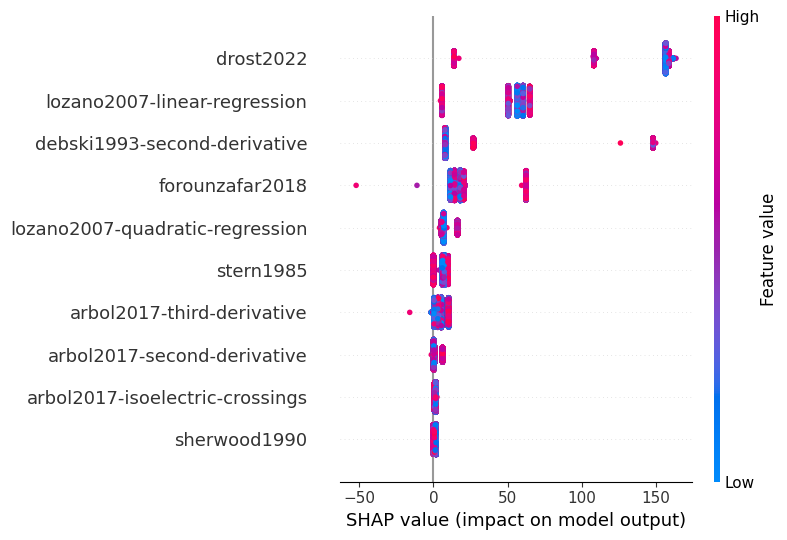

In [89]:
features = data.values
feature_names = data.columns
shap.summary_plot(
    shap_values, features=features, feature_names=feature_names
)

In [101]:
shap_per_fold[1]

array([[ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       ...,
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334],
       [ 0.82509321,  6.21103613,  3.61540348, ..., 16.27003549,
         0.6852067 ,  9.92755334]], shape=(1996, 10))

In [104]:
shap.plots.force(shap_values[0])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).